<a href="https://colab.research.google.com/github/cagrayan8/models-for-LAP/blob/main/Linear%20Regression%20(probably%20overfitted).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error 
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC  
from sklearn.datasets import load_iris  

In [76]:
from google.colab import files
uploaded = files.upload()

import io
veri = pd.read_csv(io.BytesIO(uploaded['iowa.csv']))
df = pd.read_csv('iowa.csv')
print(df)

Saving iowa.csv to iowa (1).csv
    Year  Semester  Ungrad  Prof  Grad  Post-Doc  Total
0   2022         1   24482   632  4122         0  29236
1   2021         2   25808   636  4264         0  30708
2   2021         3    6202   159  2713         0   9074
3   2021         1   24482   621  4265         0  29368
4   2020         2   26846   627  4352         0  31825
..   ...       ...     ...   ...   ...       ...    ...
66  2000         1   20251     0  4082         0  24333
67  1999         2   21901     0  4209         0  26110
68  1999         3    6033     0  2858         0   8891
69  1999         1   19825     0  4048         0  23873
70  1998         2   21427     0  4158         0  25585

[71 rows x 7 columns]


In [77]:
df.dtypes

Year        int64
Semester    int64
Ungrad      int64
Prof        int64
Grad        int64
Post-Doc    int64
Total       int64
dtype: object

In [78]:
df.describe()
     

,Year,Semester,Ungrad,Prof,Grad,Post-Doc,Total
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2010.000000,1.985915,18322.591549,337.323944,4081.478873,91.084507,22832.478873
std,6.890988,0.819285,8466.391096,242.918492,741.795868,141.837809,9375.979161
min,1998.000000,1.000000,5712.000000,0.000000,2713.000000,0.000000,8891.000000
25%,2004.000000,1.000000,7725.500000,121.500000,3170.000000,0.000000,11381.500000
50%,2010.000000,2.000000,21033.000000,408.000000,4364.000000,0.000000,25863.000000
75%,2016.000000,3.000000,24482.000000,586.000000,4651.000000,289.500000,29650.500000
max,2022.000000,3.000000,30671.000000,636.000000,5096.000000,345.000000,36660.000000


In [79]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64


In [80]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('Total',axis=1)
y = df['Total']

In [81]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [110]:
#check prediction score
regressor.score(X_test, y_test)

1.0

In [111]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.0


<Axes: >

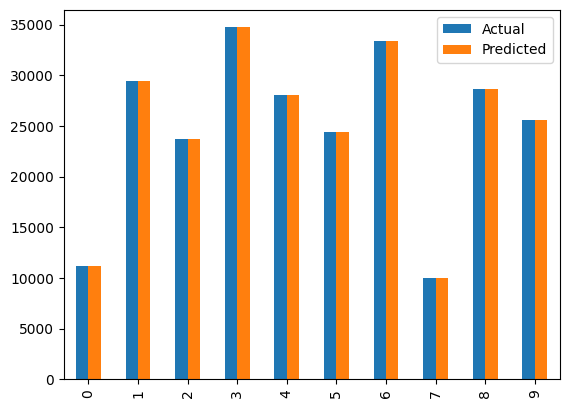

In [105]:
evaluate.head(10).plot(kind = 'bar')

In [88]:
df = df.reset_index()

In [89]:
y_pred = regressor.predict(X_test)

In [90]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [91]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.837623469531536e-11
Mean Squared Error: 1.2361387073992446e-21
Root Mean Squared Error: 3.5158764304213605e-11


In [92]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.0 degrees.
Accuracy: 100.0 %.


<ipython-input-93-c96cb49505c6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist=False, color="r", label="Actual number of student")
<ipython-input-93-c96cb49505c6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Predicted num

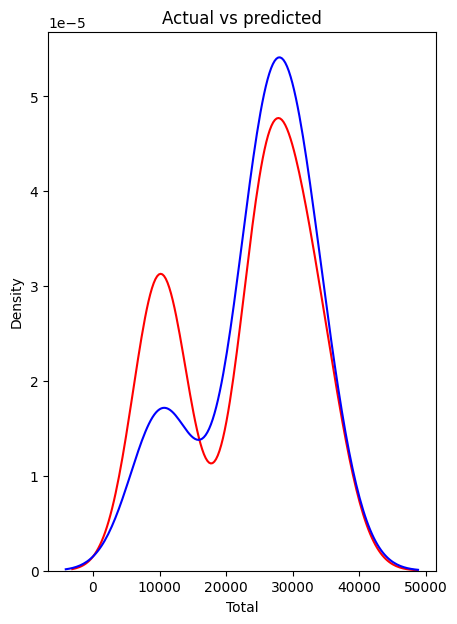

In [93]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual number of student")
sns.distplot(y_pred, hist=False, color="b", label="Predicted number of student" , ax=ax)

plt.title('Actual vs predicted')

plt.show()
plt.close()

In [94]:
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

2.837623469531536e-11
1.6522185715969246e-15


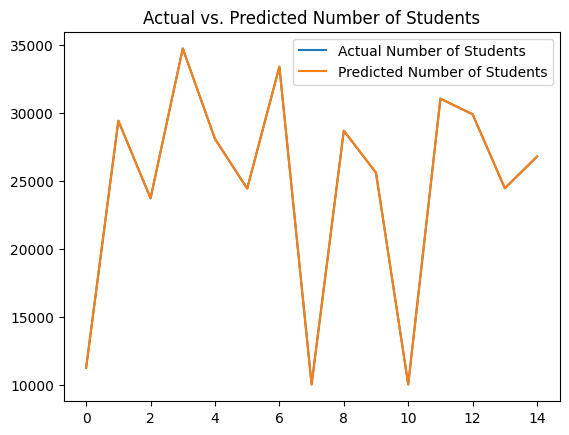

In [95]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Actual Number of Students")
plt.plot(x_ax, y_pred, label="Predicted Number of Students")
plt.title('Actual vs. Predicted Number of Students')
plt.legend()
plt.show()

In [96]:
len(y_test)
len(y_pred)

15

In [97]:
# Calculate MAE and Mape
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

2.837623469531536e-11
1.6522185715969246e-15


In [98]:
# Calculate R-squared of regression model
R_square = r2_score(y_test, y_pred)
print('Coefficient of Determination', R_square)

Coefficient of Determination 1.0
